 #  Project -1
 ---

Our project is to uncover the relationship between gold and crypto currencies. Based on the historical relation of gold and inflation, how does gold compare to Bitcoin, Etherium, Miners, and Fantom coin (FTM) against inflation now. How can we make an educated decision on where to make initial cash investment? In gold or crypto? 

# Imports

In [487]:
# Initial imports

import panel as pn
import pandas as pd
import quandl
import os
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt
import numpy as np

import hvplot.pandas
import plotly.express as px

import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:


* `LBMA-GOLD.csv`: Contains historical closing prices of gold???

* `bitcoin-price-history.csv`: ontains historical open, high, low, close, volume, and market cap of Bitcoin.

* `ethereum-price-history.csv`: Contains historical open, high, low, close, volume, and market cap of Etherium.

* `dxy-price-history.csv`: ontains historical copen, high, low, close, adj close, and volume of the dollar index



## GOLD Getting Closing Data

Read the Gold historic closing prices and create a new daily returns DataFrame from the data.

In [323]:
# Reading Gold Closing Prices
gld_hist_path = Path("./Resources/LBMA-GOLD.csv")

# Use the file path to read the CSV into a DataFrame and display a few rows
gld_hist_df = pd.read_csv(gld_hist_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

#gld_hist_df.index = pd.to_datetime(gld_hist_df.index)



gld_hist_df.sort_index(inplace=True)
gld_hist_df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN
1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN


In [324]:
# Use the `dtypes` attribute to list the column data types
gld_hist_df.dtypes

USD (AM)     float64
USD (PM)     float64
GBP (AM)     float64
GBP (PM)     float64
EURO (AM)    float64
EURO (PM)    float64
dtype: object

In [325]:
# Drop extra columns and only leave the close columns and associated values
gld_hist_df.drop(columns=['USD (AM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)', 'EURO (PM)'], inplace=True)

gld_hist_df.head()

,USD (PM)
Date,
1968-01-02,NaN
1968-01-03,NaN
1968-01-04,NaN
1968-01-05,NaN
1968-01-08,NaN


In [326]:
# Rename the column "USD (PM)" to "Close" to match with other files
gld_hist_df.columns = ['Close']
gld_hist_df.head()

,Close
Date,
1968-01-02,NaN
1968-01-03,NaN
1968-01-04,NaN
1968-01-05,NaN
1968-01-08,NaN


In [327]:
# Count nulls
gld_hist_df.isnull()

,Close
Date,
1968-01-02,True
1968-01-03,True
1968-01-04,True
1968-01-05,True
1968-01-08,True
...,...
2021-06-24,False
2021-06-25,False
2021-06-28,False


In [328]:
# Determining number of nulls
gld_hist_df.isnull().sum()

Close    143
dtype: int64

In [329]:
# Drop nulls
# Use the `dropna` function to drop whole records that have at least one null value
gld_hist_df.dropna(inplace=True)

In [330]:
# Check again number of nulls to make sure we have none. Use the `isnull` function in conjunction with the `sum` function to count the number of null values 
gld_hist_df.isnull().sum()

Close    0
dtype: int64

In [331]:
# Check Data Types
gld_hist_df.dtypes

Close    float64
dtype: object

In [332]:
# Fix Data Types
# Use the `as_type` function to convert `Close` from `float` to `int`
gld_hist_df['Close'] = gld_hist_df['Close'].astype('int')

gld_hist_df.dtypes

Close    int64
dtype: object

In [333]:
# Use the "drop_duplicates()"to drop any duplicates
gld_hist_df.drop_duplicates()
gld_hist_df.head()

,Close
Date,
1968-04-01,37
1968-04-02,37
1968-04-03,37
1968-04-04,36
1968-04-05,37


## GOLD Getting DAILY RETURNS



In [334]:
# Calculate Daily Returns
# Use the `pct_change` function to calculate daily returns 
DailyReturn_gld_hist_df = gld_hist_df.pct_change()

#print(DailyReturn_gld_hist_df )
DailyReturn_gld_hist_df.head()

,Close
Date,
1968-04-01,NaN
1968-04-02,0.000000
1968-04-03,0.000000
1968-04-04,-0.027027
1968-04-05,0.027778


In [335]:
# Count nulls of Gold Daily Returns
DailyReturn_gld_hist_df.isnull().sum()

Close    1
dtype: int64

In [336]:
# Drop nulls of Gold Daily Returns
# Use the `dropna` function to drop whole records that have at least one null value
DailyReturn_gld_hist_df.dropna(inplace=True)

DailyReturn_gld_hist_df.isnull().sum()

Close    0
dtype: int64

In [337]:
# Rename `Close` Column to be specific to this portfolio.
DailyReturn_gld_hist_df.columns = ['GOLD']
DailyReturn_gld_hist_df.head()

,GOLD
Date,
1968-04-02,0.000000
1968-04-03,0.000000
1968-04-04,-0.027027
1968-04-05,0.027778
1968-04-08,0.000000


## BITCOIN Getting Closing Data

Read the Bitcoin historic closing prices and create a new daily returns DataFrame from the data.

In [338]:
# Reading Bitcoin Closing Prices
btc_hist_path = Path("./Resources/bitcoin-price-history.csv")
btc_hist_df = pd.read_csv(btc_hist_path, index_col="Date",infer_datetime_format=True, parse_dates=True)

btc_hist_df.sort_index(inplace=True)
btc_hist_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-07-17,96.7100,99.9700,96.1800,98.5000,0.0,1.120160e+09
2013-07-18,98.5000,98.8000,86.2000,90.5800,0.0,1.050191e+09
2013-07-19,90.0689,95.2001,87.8000,92.1700,0.0,1.035626e+09
2013-07-20,92.0000,93.1000,89.2711,89.3901,0.0,1.051175e+09
2013-07-21,89.8214,91.9500,88.0000,90.7573,0.0,1.025637e+09


In [339]:
# Check Data Types
# Drop extra columns and only leave the close columns and associated values
btc_hist_df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Market Cap'], inplace=True)

btc_hist_df.head()

,Close
Date,
2013-07-17,98.5000
2013-07-18,90.5800
2013-07-19,92.1700
2013-07-20,89.3901
2013-07-21,90.7573


In [340]:
# Count nulls
btc_hist_df.isnull()

,Close
Date,
2013-07-17,False
2013-07-18,False
2013-07-19,False
2013-07-20,False
2013-07-21,False
...,...
2021-07-19,False
2021-07-20,False
2021-07-21,False


In [341]:
# Determining number of nulls
btc_hist_df.isnull().sum()

Close    0
dtype: int64

In [342]:
# Drop nulls
# Use the `dropna` function to drop whole records that have at least one null value
btc_hist_df.dropna(inplace=True)

In [343]:
# Check again number of nulls to make sure we have none. Use the `isnull` function in conjunction with the `sum` function to count the number of null values 
btc_hist_df.isnull().sum()

Close    0
dtype: int64

In [344]:
# Check Data Types
btc_hist_df.dtypes

Close    float64
dtype: object

In [345]:
# Fix Data Types
# Use the `as_type` function to convert `Close` from `float` to `int`
btc_hist_df['Close'] = btc_hist_df['Close'].astype('int')

btc_hist_df.dtypes

Close    int64
dtype: object

In [346]:
# Use the "drop_duplicates()"to drop any duplicates
btc_hist_df.drop_duplicates()
btc_hist_df.head()

,Close
Date,
2013-07-17,98
2013-07-18,90
2013-07-19,92
2013-07-20,89
2013-07-21,90


## BITCOIN Getting DAILY RETURNS


In [347]:
# Calculate Daily Returns
# Use the `pct_change` function to calculate daily returns 
DailyReturn_btc_hist_df = btc_hist_df.pct_change()

#print(DailyReturn_gld_hist_df )
DailyReturn_btc_hist_df.head()

,Close
Date,
2013-07-17,NaN
2013-07-18,-0.081633
2013-07-19,0.022222
2013-07-20,-0.032609
2013-07-21,0.011236


In [348]:
# Count nulls of Bitcoin Daily Returns
DailyReturn_btc_hist_df.isnull().sum()

Close    1
dtype: int64

In [349]:
# Drop nulls of Bitcoin Daily Returns
# Use the `dropna` function to drop whole records that have at least one null value
DailyReturn_btc_hist_df.dropna(inplace=True)

DailyReturn_btc_hist_df.isnull().sum()

Close    0
dtype: int64

In [350]:
# Rename `Close` Column to be specific to this portfolio.
DailyReturn_btc_hist_df.columns = ['BITCOIN']
DailyReturn_btc_hist_df.head()

,BITCOIN
Date,
2013-07-18,-0.081633
2013-07-19,0.022222
2013-07-20,-0.032609
2013-07-21,0.011236
2013-07-22,0.011111


## ETHERIUM Getting Closing Data 

Read the Etherium historic closing prices and create a new daily returns DataFrame from the data. 

In [351]:
# Reading Etherium Closing Prices
eth_hist_path = Path("./Resources/ethereum-price-history.csv")
eth_hist_df = pd.read_csv(eth_hist_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

eth_hist_df.sort_index(inplace=True)
eth_hist_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2016-07-25,12.7495,13.8570,12.6838,13.8105,6.168861e+07,1.095915e+09
2016-07-26,13.8361,13.8511,11.7272,11.7632,5.788441e+07,1.056037e+09
2016-07-27,11.9895,13.3119,11.8357,12.9646,8.589149e+07,1.046191e+09
2016-07-28,12.9728,12.9882,12.4927,12.8619,3.914490e+07,1.050281e+09
2016-07-29,12.8436,12.8706,12.5542,12.8162,1.877377e+07,1.046257e+09


In [352]:
# Check Data Types
# Drop extra columns and only leave the close columns and associated values
eth_hist_df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Market Cap'], inplace=True)

eth_hist_df.head()

,Close
Date,
2016-07-25,13.8105
2016-07-26,11.7632
2016-07-27,12.9646
2016-07-28,12.8619
2016-07-29,12.8162


In [353]:
# Check Data Types
eth_hist_df.dtypes

Close    float64
dtype: object

In [354]:
# Fix Data Types
# Use the `as_type` function to convert `Close` from `float` to `int`
eth_hist_df['Close'] = eth_hist_df['Close'].astype('int')

eth_hist_df.dtypes

Close    int64
dtype: object

In [355]:
# Count nulls
eth_hist_df.isnull()

,Close
Date,
2016-07-25,False
2016-07-26,False
2016-07-27,False
2016-07-28,False
2016-07-29,False
...,...
2021-07-19,False
2021-07-20,False
2021-07-21,False


In [356]:
# Determining number of nulls
eth_hist_df.isnull().sum()

Close    0
dtype: int64

In [357]:
# Drop nulls
# Use the `dropna` function to drop whole records that have at least one null value
eth_hist_df.dropna(inplace=True)

In [358]:
# Check again number of nulls to make sure we have none. Use the `isnull` function in conjunction with the `sum` function to count the number of null values 
eth_hist_df.isnull().sum()

Close    0
dtype: int64

In [359]:
# Use the "drop_duplicates()"to drop any duplicates
eth_hist_df.drop_duplicates()
eth_hist_df.head()

,Close
Date,
2016-07-25,13
2016-07-26,11
2016-07-27,12
2016-07-28,12
2016-07-29,12


## ETHERIUM Getting DAILY RETURNS

In [360]:
# Calculate Daily Returns
# Use the `pct_change` function to calculate daily returns 
DailyReturn_eth_hist_df = eth_hist_df.pct_change()

#print(DailyReturn_gld_hist_df )
DailyReturn_eth_hist_df.head()

,Close
Date,
2016-07-25,NaN
2016-07-26,-0.153846
2016-07-27,0.090909
2016-07-28,0.000000
2016-07-29,0.000000


In [361]:
# Count nulls of Etherium Daily Returns
DailyReturn_eth_hist_df.isnull().sum()

Close    1
dtype: int64

In [362]:
# Drop nulls of Etherium Daily Returns
# Use the `dropna` function to drop whole records that have at least one null value
DailyReturn_eth_hist_df.dropna(inplace=True)

DailyReturn_eth_hist_df.isnull().sum()

Close    0
dtype: int64

In [363]:
# Rename `Close` Column to be specific to this portfolio.
DailyReturn_eth_hist_df.columns = ['ETHERIUM']
DailyReturn_eth_hist_df.head()

,ETHERIUM
Date,
2016-07-26,-0.153846
2016-07-27,0.090909
2016-07-28,0.000000
2016-07-29,0.000000
2016-07-30,0.000000


## DOLLAR INDEX Getting Closing Data 

Read the Dollar Index historic closing prices and create a new daily returns DataFrame from the data. 

In [364]:
# Reading DXY Closing Prices
dxy_hist_path = Path("./Resources/dxy-price-history.csv")
dxy_hist_df = pd.read_csv(dxy_hist_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

dxy_hist_df.sort_index(inplace=True)
dxy_hist_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-08-24,117.839996,117.839996,117.839996,117.839996,117.839996,0.0
1971-08-25,117.839996,117.839996,117.839996,117.839996,117.839996,0.0
1971-08-26,117.839996,117.839996,117.839996,117.839996,117.839996,0.0
1971-08-27,117.839996,117.839996,117.839996,117.839996,117.839996,0.0
1971-08-29,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
# Drop extra columns and only leave the close columns and associated values
dxy_hist_df.drop(columns=['Open', 'High', 'Low', 'Adj Close','Volume' ], inplace=True)

dxy_hist_df.head()

,Close
Date,
1971-08-24,117.839996
1971-08-25,117.839996
1971-08-26,117.839996
1971-08-27,117.839996
1971-08-29,NaN


In [366]:
# Count nulls
dxy_hist_df.isnull()

,Close
Date,
1971-08-24,False
1971-08-25,False
1971-08-26,False
1971-08-27,False
1971-08-29,True
...,...
2021-07-19,False
2021-07-20,False
2021-07-21,False


In [367]:
# Determining number of nulls
dxy_hist_df.isnull().sum()

Close    2840
dtype: int64

In [368]:
# Drop nulls
# Use the `dropna` function to drop whole records that have at least one null value
dxy_hist_df.dropna(inplace=True)

In [369]:
# Check again number of nulls to make sure we have none. Use the `isnull` function in conjunction with the `sum` function to count the number of null values 
dxy_hist_df.isnull().sum()

Close    0
dtype: int64

In [370]:
# Check Data Types
dxy_hist_df.dtypes

Close    float64
dtype: object

In [371]:
# Fix Data Types
# Use the `as_type` function to convert `Close` from `float` to `int`
dxy_hist_df['Close'] = dxy_hist_df['Close'].astype('int')

dxy_hist_df.dtypes

Close    int64
dtype: object

In [372]:
# Use the "drop_duplicates()"to drop any duplicates
dxy_hist_df.drop_duplicates()
dxy_hist_df.head()

,Close
Date,
1971-08-24,117
1971-08-25,117
1971-08-26,117
1971-08-27,117
1971-08-30,117


## DOLLAR INDEX Getting DAILY RETURNS

In [373]:
# Calculate Daily Returns
# Use the `pct_change` function to calculate daily returns 
DailyReturn_dxy_hist_df = dxy_hist_df.pct_change()

#print(DailyReturn_gld_hist_df )
DailyReturn_dxy_hist_df.head()

,Close
Date,
1971-08-24,NaN
1971-08-25,0.0
1971-08-26,0.0
1971-08-27,0.0
1971-08-30,0.0


In [374]:
# Count nulls of Etherium Daily Returns
DailyReturn_dxy_hist_df.isnull().sum()

Close    1
dtype: int64

In [375]:
# Drop nulls of Dollar Index Daily Returns
# Use the `dropna` function to drop whole records that have at least one null value
DailyReturn_dxy_hist_df.dropna(inplace=True)

DailyReturn_dxy_hist_df.isnull().sum()

Close    0
dtype: int64

In [376]:
# Rename `Close` Column to be specific to this portfolio.
DailyReturn_dxy_hist_df.columns = ['DXY']
DailyReturn_dxy_hist_df.head()

,DXY
Date,
1971-08-25,0.000000
1971-08-26,0.000000
1971-08-27,0.000000
1971-08-30,0.000000
1971-08-31,-0.008547


## TETHER Getting Closing Data

Read the Tether closing data and create a new daily returns DataFrame from the data.

In [377]:
# Reading Tether Closing Prices
tether_hist_path = Path("./Resources/tether-price-history.csv")
tether_hist_df = pd.read_csv(tether_hist_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

tether_hist_df.sort_index(inplace=True)
tether_hist_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-29,1.00253,1.01681,0.995690,1.00152,1.178964e+08,3.201709e+08
2017-08-30,1.00170,1.00721,0.996119,1.00074,1.367042e+08,3.199817e+08
2017-08-31,1.00006,1.00823,0.999514,1.00312,1.022734e+08,3.202965e+08
2017-09-01,1.00405,1.01373,1.000540,1.00437,1.434681e+08,3.211231e+08
2017-09-02,1.00459,1.04082,0.998739,1.01788,2.954876e+08,3.330269e+08


In [378]:
# Drop extra columns and only leave the close columns and associated values
tether_hist_df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Market Cap'], inplace=True)

tether_hist_df.head()

,Close
Date,
2017-08-29,1.00152
2017-08-30,1.00074
2017-08-31,1.00312
2017-09-01,1.00437
2017-09-02,1.01788


In [379]:
# Count nulls
tether_hist_df.isnull()

,Close
Date,
2017-08-29,False
2017-08-30,False
2017-08-31,False
2017-09-01,False
2017-09-02,False
...,...
2021-07-24,False
2021-07-25,False
2021-07-26,False


In [380]:
# Determining number of nulls
tether_hist_df.isnull().sum()

Close    0
dtype: int64

In [381]:
# Drop nulls
# Use the `dropna` function to drop whole records that have at least one null value
tether_hist_df.dropna(inplace=True)

In [382]:
# Check again number of nulls to make sure we have none. Use the `isnull` function in conjunction with the `sum` function to count the number of null values 
tether_hist_df.isnull().sum()

Close    0
dtype: int64

In [383]:
# Check Data Types
tether_hist_df.dtypes

Close    float64
dtype: object

In [384]:
# Fix Data Types
# Use the `as_type` function to convert `Close` from `float` to `int`
tether_hist_df['Close'] = tether_hist_df['Close'].astype('int')

tether_hist_df.dtypes

Close    int64
dtype: object

In [385]:
# Use the "drop_duplicates()"to drop any duplicates
tether_hist_df.drop_duplicates()
tether_hist_df.head()

,Close
Date,
2017-08-29,1
2017-08-30,1
2017-08-31,1
2017-09-01,1
2017-09-02,1


## TETHER Getting DAILY RETURNS

In [386]:
# Calculate Daily Returns
# Use the `pct_change` function to calculate daily returns 
DailyReturn_tether_hist_df = tether_hist_df.pct_change()

#print(DailyReturn_gld_hist_df )
DailyReturn_tether_hist_df.head()

,Close
Date,
2017-08-29,NaN
2017-08-30,0.0
2017-08-31,0.0
2017-09-01,0.0
2017-09-02,0.0


In [387]:
# Count nulls of Tether Daily Returns
DailyReturn_tether_hist_df.isnull().sum()

Close    237
dtype: int64

In [388]:
# Drop nulls of Tether Daily Returns
# Use the `dropna` function to drop whole records that have at least one null value
DailyReturn_tether_hist_df.dropna(inplace=True)

DailyReturn_tether_hist_df.isnull().sum()

Close    0
dtype: int64

In [389]:
# Rename `Close` Column to be specific to this portfolio.
DailyReturn_tether_hist_df.columns = ['TETHER']
DailyReturn_tether_hist_df.head()

,TETHER
Date,
2017-08-30,0.0
2017-08-31,0.0
2017-09-01,0.0
2017-09-02,0.0
2017-09-03,0.0


## Combine ALL RETURNS

In [457]:
# Join Gold, Bitcoin, Etherium, and the Dollar Index Returns into a single DataFrame with columns for each portfolio's returns.

# Concatenate all dataframes into one dataframe
df_daily = pd.concat([DailyReturn_gld_hist_df, DailyReturn_btc_hist_df, DailyReturn_eth_hist_df, DailyReturn_dxy_hist_df, DailyReturn_tether_hist_df], axis = "columns", join = "inner")

#df_daily.index = pd.to_datetime(df_daily.index)

# Sort datetime index in ascending order (past to present)
df_daily.sort_index(ascending = True, inplace=True)

# Display a few rows of the combined RETURNS' TABLE
df_daily.head()



,GOLD,BITCOIN,ETHERIUM,DXY,TETHER
Date,,,,,
2017-08-30,-0.007587,-0.001748,0.018868,0.0,0.0
2017-08-31,0.002294,0.029772,0.013228,0.0,0.0
2017-09-01,0.006865,0.037202,0.010444,0.0,0.0
2017-09-05,0.001500,0.037879,0.061017,0.0,0.0
2017-09-06,0.001498,0.047673,0.067093,0.0,0.0


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Compute cumulative returns from simple daily returns
We will use formula (a) and pandas built in function pct_change to compute the simple returns for each day, each stock in our dataset.

In [458]:
# compute daily returns using pandas pct_change()
df_daily_returns = df_daily.pct_change()
# skip first row with NA 
df_daily_returns = df_daily_returns[1:]
df_daily_returns

,GOLD,BITCOIN,ETHERIUM,DXY,TETHER
Date,,,,,
2017-08-31,-1.302294,-18.029772,-0.298942,NaN,NaN
2017-09-01,1.993135,0.249562,-0.210444,NaN,NaN
2017-09-05,-0.781445,0.018182,4.842373,NaN,NaN
2017-09-06,-0.001498,0.258577,0.099574,NaN,NaN
2017-09-07,1.995512,-0.954330,-1.223125,-inf,NaN
...,...,...,...,...,...
2021-06-24,-1.433592,-0.298072,-0.838621,NaN,NaN
2021-06-25,-1.286835,-3.991893,-10.681247,NaN,-inf
2021-06-28,-3.996641,-0.951252,-1.680170,NaN,-1.0


In [459]:
df_daily_returns.dtypes


GOLD        float64
BITCOIN     float64
ETHERIUM    float64
DXY         float64
TETHER      float64
dtype: object

In [460]:
# Count nulls of all Daily Returns
df_daily_returns.isnull().sum()

GOLD          2
BITCOIN       0
ETHERIUM      1
DXY         418
TETHER      543
dtype: int64

In [461]:
# Drop nulls of Tether Daily Returns
# Use the `dropna` function to drop whole records that have at least one null value
df_daily_returns.dropna(inplace=True)

df_daily_returns.isnull().sum()


GOLD        0
BITCOIN     0
ETHERIUM    0
DXY         0
TETHER      0
dtype: int64

# DAILY Returns of all portfolios' Graph (.pct_change)

<AxesSubplot:xlabel='Date'>

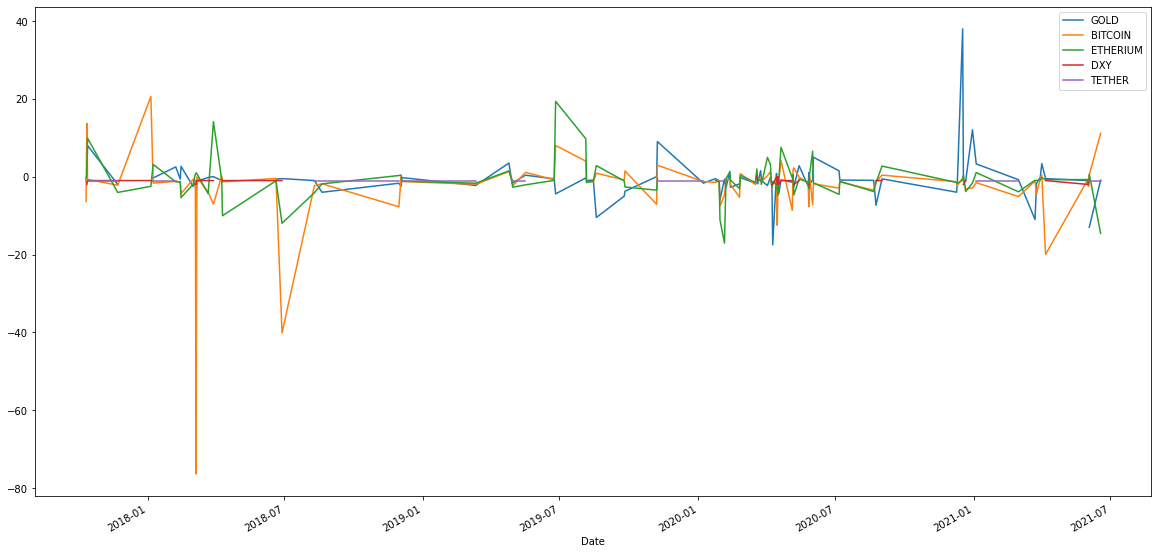

In [462]:
# Plot daily returns of all portfolios
df_daily_returns.plot(figsize=(20,10))

---

And finally, the formula (c) on the dataframe of daily returns using pandas' cumprod function.

In [463]:
# Calculate the cumulative daily returns
df_cum_daily_returns = (1 + df_daily_returns).cumprod() - 1
df_cum_daily_returns = df_cum_daily_returns.reset_index()
df_cum_daily_returns

#df_cum_daily_returns.plot()
#print(df_cum_daily_returns.tail())

,Date,GOLD,BITCOIN,ETHERIUM,DXY,TETHER
0,2017-10-11,-1.152297,-6.384015e+00,-0.506667,-inf,-1.0
1,2017-10-12,-0.923733,-8.017006e+01,-0.264901,inf,NaN
2,2017-10-13,-0.314132,-2.258471e+01,7.006557,NaN,NaN
3,2017-11-22,-1.687471,2.447988e+01,-25.420000,NaN,NaN
4,2018-01-05,-inf,5.498157e+02,35.180200,NaN,NaN
...,...,...,...,...,...,...
90,2021-04-06,NaN,6.581632e+05,NaN,NaN,NaN
91,2021-06-01,NaN,1.684584e+05,NaN,NaN,NaN
92,2021-06-02,NaN,-2.502358e+05,NaN,NaN,NaN
93,2021-06-03,NaN,-3.666545e+05,NaN,NaN,NaN


In [464]:
# Count nulls of all Daily Returns
df_cum_daily_returns.isnull().sum()

Date         0
GOLD        80
BITCOIN      0
ETHERIUM    55
DXY         93
TETHER      94
dtype: int64

In [465]:
# Drop nulls of Tether Daily Returns
# Use the `dropna` function to drop whole records that have at least one null value
df_cum_daily_returns.dropna(inplace=True)

df_cum_daily_returns.isnull().sum()

Date        0
GOLD        0
BITCOIN     0
ETHERIUM    0
DXY         0
TETHER      0
dtype: int64

# COMMULATIVE DAILY Returns of all portfolios' Graph (..cumprod() - 1)

In [466]:
# Plot cumulative returns

#df_cum_daily_returns.plot()
print(df_cum_daily_returns.tail())

        Date      GOLD   BITCOIN  ETHERIUM  DXY  TETHER
0 2017-10-11 -1.152297 -6.384015 -0.506667 -inf    -1.0


In [467]:
# reset the index, moving `date` as column
df_daily_returns = df_daily_returns.reset_index()
# use `melt`
df1 = df_daily_returns.melt(id_vars=['Date'], var_name='ticker', value_name='df_daily_returns')
# add one more column, showing the daily_return as percent
df1['daily_return_pct'] = df1['df_daily_returns'] * 100
df1

,Date,ticker,df_daily_returns,daily_return_pct
0,2017-10-11,GOLD,-1.152297,-115.229697
1,2017-10-12,GOLD,-1.500776,-150.077580
2,2017-10-13,GOLD,7.993023,799.302326
3,2017-11-22,GOLD,-2.002338,-200.233827
4,2018-01-05,GOLD,inf,inf
...,...,...,...,...
470,2021-04-06,TETHER,-1.000000,-100.000000
471,2021-06-01,TETHER,-inf,-inf
472,2021-06-02,TETHER,-inf,-inf
473,2021-06-03,TETHER,-1.000000,-100.000000


---

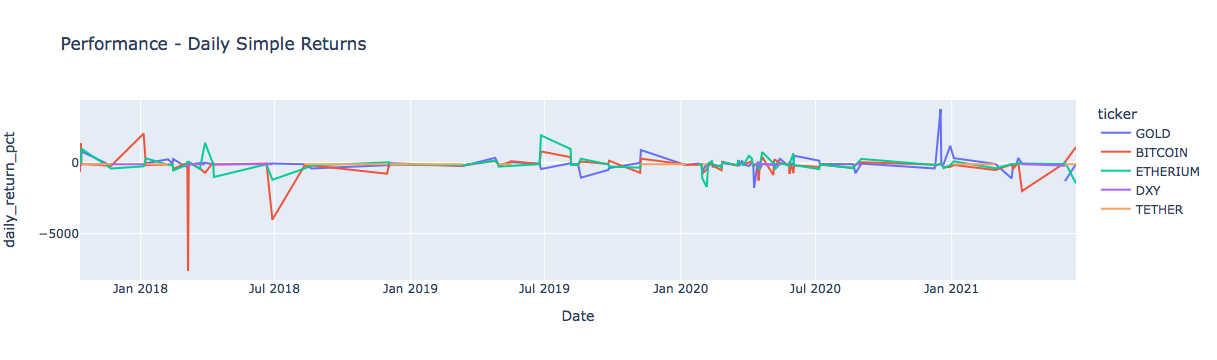

In [468]:
fig = px.line(df1, x='Date',
              y='daily_return_pct', color='ticker',
              title='Performance - Daily Simple Returns',
              labels={'df_daily':'daily returns (%)'})
fig.show()

In [469]:
df2 = df_cum_daily_returns.melt(id_vars=['Date'], var_name='ticker', value_name='cum_return')
df2['cum_return_pct'] = df2['cum_return'] * 100
df2

,Date,ticker,cum_return,cum_return_pct
0,2017-10-11,GOLD,-1.152297,-115.229697
1,2017-10-11,BITCOIN,-6.384015,-638.401468
2,2017-10-11,ETHERIUM,-0.506667,-50.666667
3,2017-10-11,DXY,-inf,-inf
4,2017-10-11,TETHER,-1.000000,-100.000000


---

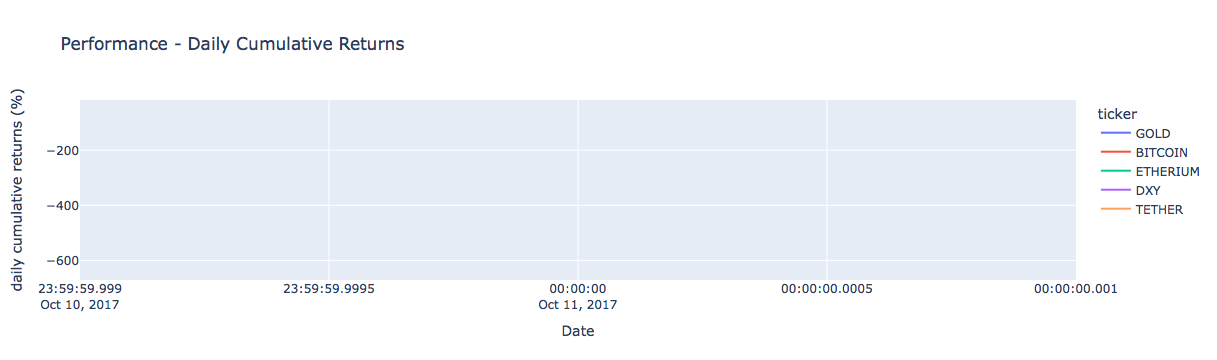

In [473]:
fig = px.line(df2, x='Date',
              y='cum_return_pct', color='ticker',
              title='Performance - Daily Cumulative Returns',
              labels={'cum_return_pct':'daily cumulative returns (%)', })
fig.show()

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the Dollar Index (then just having cash in your pocket)
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

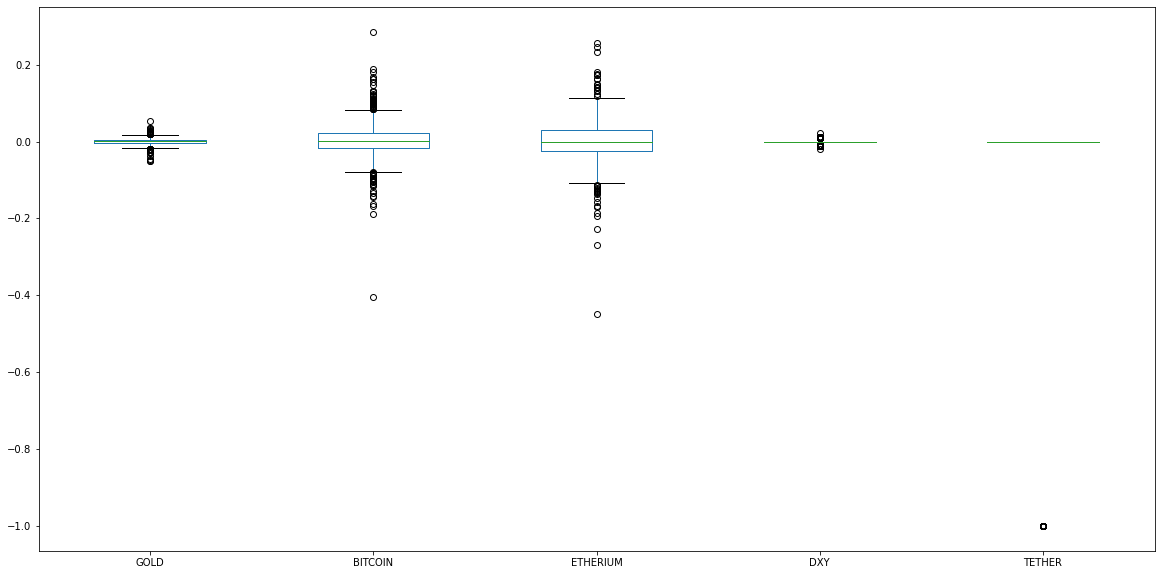

In [447]:
#  Box plot to visually show risk
df_daily.plot(kind = "box", figsize = (20, 10))

### Calculate Standard Deviations

In [448]:
#  Calculate the daily standard deviations of all portfolios
#Std_df_daily_returns=df_daily_returns.std()
Std_df_daily_returns=pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})

#Std_df_daily_returns.sort_values(inplace=True)
Std_df_daily_returns

,std
GOLD,0.009362
BITCOIN,0.048403
ETHERIUM,0.057320
DXY,0.005659
TETHER,NaN


## Filter DataFrame Between 2010-01-01 to 2021-01-01

In [449]:
# Use the `set_index` function to set the `Date` as the index to the DataFrame
df_daily_returns.set_index('Date', inplace=True)

In [450]:
# After setting the `Date` as the index, loc can be used to specify a range of dates
TenY_filtered_df = df_daily_returns.loc['2010-01-01':'2021-01-01', :]
TenY_filtered_df

,GOLD,BITCOIN,ETHERIUM,DXY,TETHER
Date,,,,,
2017-10-11,-1.152297,-6.384015,-0.506667,-inf,-1.0
2017-10-12,-1.500776,13.704652,0.490066,-2.010870,-inf
2017-10-13,7.993023,-0.727363,9.891803,-1.000000,-1.0
2017-11-22,-2.002338,-2.180460,-4.050000,-1.000000,-1.0
2018-01-05,inf,20.617671,-2.481581,-1.000000,-inf
...,...,...,...,...,...
2020-12-10,-1.112741,-2.245708,-1.742018,-1.989011,-1.0
2020-12-17,37.978930,-0.314909,-0.842366,-inf,-inf
2020-12-18,-1.276231,-0.813531,0.234472,-2.011236,-inf


<AxesSubplot:xlabel='Date'>

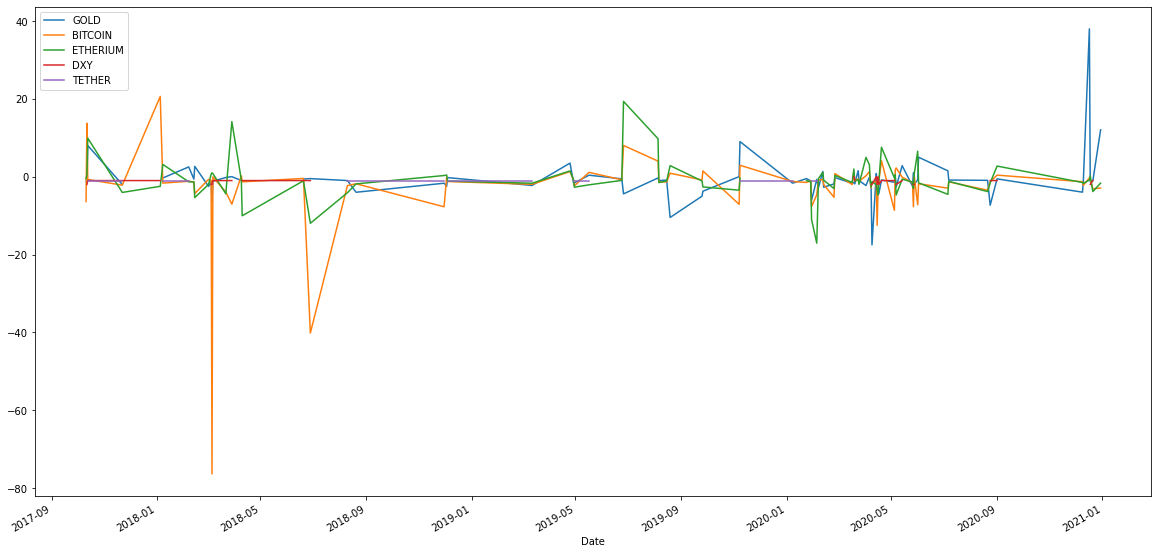

In [451]:
TenY_filtered_df.plot(figsize=(20,10))

### Determine which portfolios are riskier than the Dollar Index

In [452]:
# Calculate  the daily standard deviation of DXY
DXY_std = df_daily["DXY"].std()
DXY_std

# Determine which portfolios are riskier than the DXY


0.005658912563947321

### Calculate the Annualized Standard Deviation

In [453]:
# Calculate the annualized standard deviation (252 trading days)
volatility = df_daily.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

DXY         0.089832
GOLD        0.148613
BITCOIN     0.768374
ETHERIUM    0.909928
TETHER           NaN
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the DXY using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the DXY
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the DXY

### Calculate and Plot Beta for a chosen portfolio and the DXY
Calculate covariance of a single portfolio
Calculate variance of DXY
Computing beta
Plot beta trend


## GOLD VS DXY

In [492]:
# Calculate covariance of a single portfolio
GD_covariance = df_daily['GOLD'].cov(df_daily['DXY'])
GD_covariance

-1.2691022054939686e-05

In [493]:
# Calculate variance of DXY
GD_variance = df_daily['GOLD'].var()
GD_variance

8.764207402989091e-05

In [515]:
# Computing beta
Gold_beta = GD_covariance / GD_variance
Gold_beta

-0.1448051315012391

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of GOLD Returns vs. DXY Returns'}, xlabel='Date'>

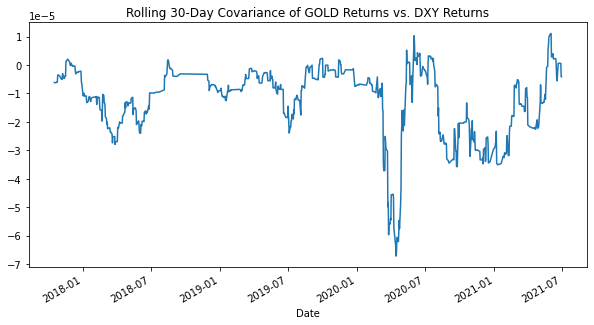

In [516]:
# Calculate 30-day rolling covariance of GOLD vs. DXY and plot the data
GD_rolling_covariance = df_daily['GOLD'].rolling(window=30).cov(df_daily['DXY'])
GD_rolling_covariance.plot(figsize=(10, 5), title='Rolling 30-Day Covariance of GOLD Returns vs. DXY Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of DXY Returns'}, xlabel='Date'>

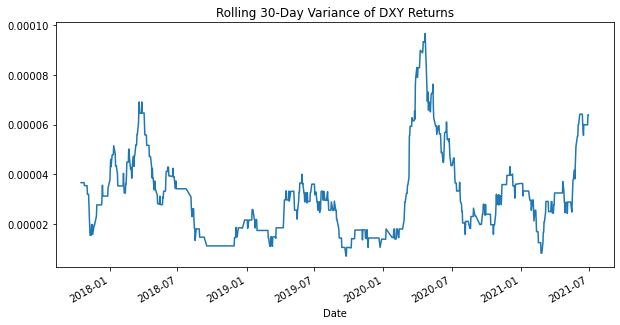

In [517]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_variance = df_daily['DXY'].rolling(window=30).var()
rolling_variance.plot(figsize=(10, 5), title='Rolling 30-Day Variance of DXY Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of GOLD'}, xlabel='Date'>

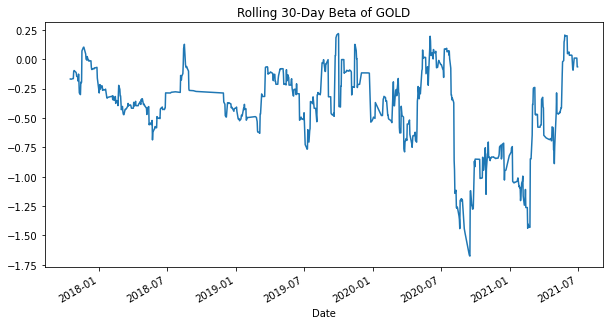

In [520]:
# Calculate 30-day rolling beta of MSFT and plot the data
GD_rolling_beta = GD_rolling_covariance / rolling_variance
GD_rolling_beta.plot(figsize=(10, 5), title='Rolling 30-Day Beta of GOLD')

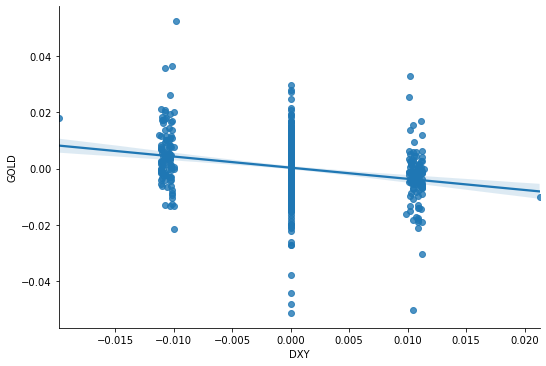

In [540]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
B1 = sns.lmplot(x='DXY', y='GOLD', data=df_daily, aspect=1.5, fit_reg=True)

## BITCOIN VS DXY

In [508]:
# Calculate covariance of a single portfolio
BD_covariance = df_daily['BITCOIN'].cov(df_daily['DXY'])
BD_covariance

-2.4258549505965372e-05

In [509]:
# Calculate variance of DXY
BD_variance = df_daily['BITCOIN'].var()
BD_variance

0.0023428488093369384

In [522]:
# Computing beta
Bitcoin_beta = BD_covariance / BD_variance
Bitcoin_beta

-0.010354295765602949

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of BITCOIN Returns vs. DXY Returns'}, xlabel='Date'>

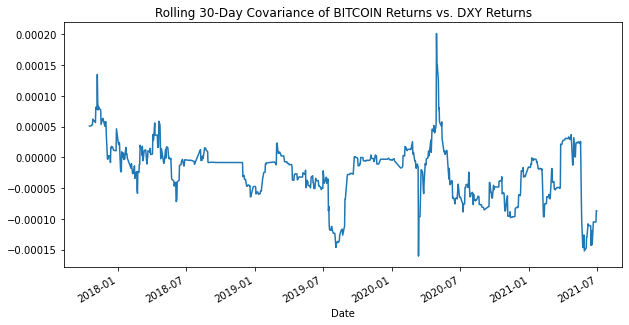

In [523]:
# Calculate 30-day rolling covariance of GOLD vs. DXY and plot the data
BD_rolling_covariance = df_daily['BITCOIN'].rolling(window=30).cov(df_daily['DXY'])
BD_rolling_covariance.plot(figsize=(10, 5), title='Rolling 30-Day Covariance of BITCOIN Returns vs. DXY Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of DXY Returns'}, xlabel='Date'>

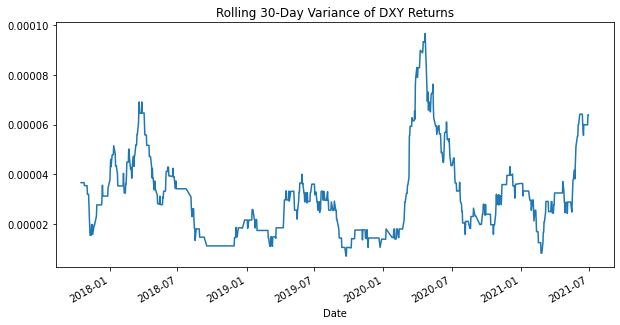

In [524]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_variance = df_daily['DXY'].rolling(window=30).var()
rolling_variance.plot(figsize=(10, 5), title='Rolling 30-Day Variance of DXY Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of BITCOIN'}, xlabel='Date'>

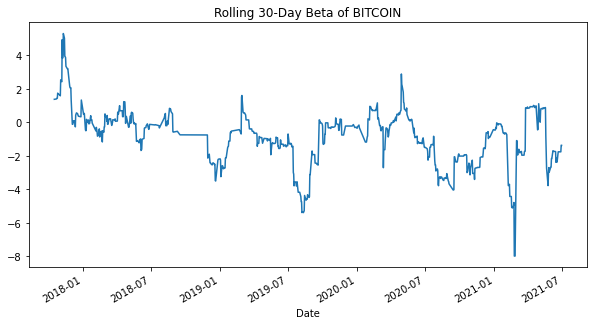

In [527]:
# Calculate 30-day rolling beta of MSFT and plot the data
BD_rolling_beta = BD_rolling_covariance / rolling_variance
BD_rolling_beta.plot(figsize=(10, 5), title='Rolling 30-Day Beta of BITCOIN')

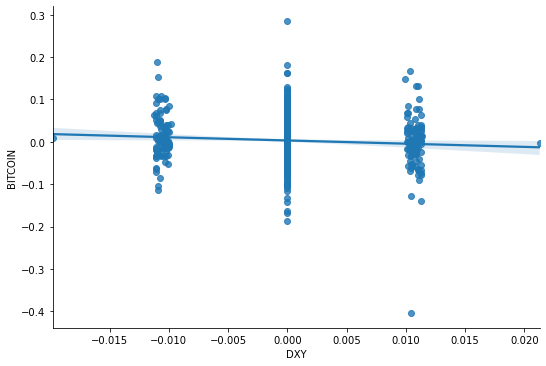

In [541]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
B2 = sns.lmplot(x='DXY', y='BITCOIN', data=df_daily, aspect=1.5, fit_reg=True)

## ETHERIUM VS DXY

In [529]:
# Calculate covariance of a single portfolio
ED_covariance = df_daily['ETHERIUM'].cov(df_daily['DXY'])
ED_covariance

-2.2672704285880892e-05

In [530]:
# Calculate variance of DXY
ED_variance = df_daily['ETHERIUM'].var()
ED_variance

0.0032855921264462414

In [531]:
# Computing beta
Etherium_beta = ED_covariance / ED_variance
Etherium_beta

-0.006900644819356844

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of ETHERIUM Returns vs. DXY Returns'}, xlabel='Date'>

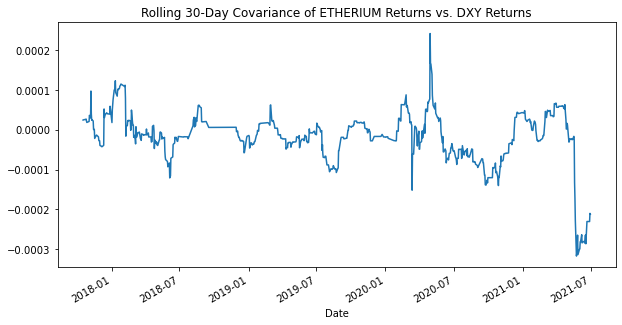

In [532]:
# Calculate 30-day rolling covariance of GOLD vs. DXY and plot the data
ED_rolling_covariance = df_daily['ETHERIUM'].rolling(window=30).cov(df_daily['DXY'])
ED_rolling_covariance.plot(figsize=(10, 5), title='Rolling 30-Day Covariance of ETHERIUM Returns vs. DXY Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of DXY Returns'}, xlabel='Date'>

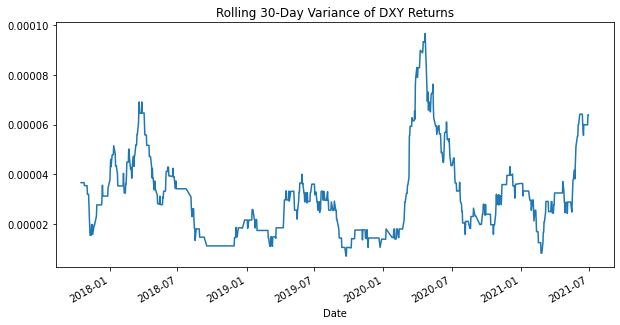

In [533]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_variance = df_daily['DXY'].rolling(window=30).var()
rolling_variance.plot(figsize=(10, 5), title='Rolling 30-Day Variance of DXY Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of ETHERIUM'}, xlabel='Date'>

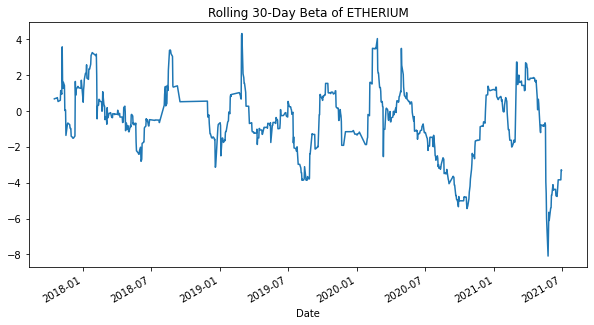

In [535]:
# Calculate 30-day rolling beta of MSFT and plot the data
ED_rolling_beta = ED_rolling_covariance / rolling_variance
ED_rolling_beta.plot(figsize=(10, 5), title='Rolling 30-Day Beta of ETHERIUM')

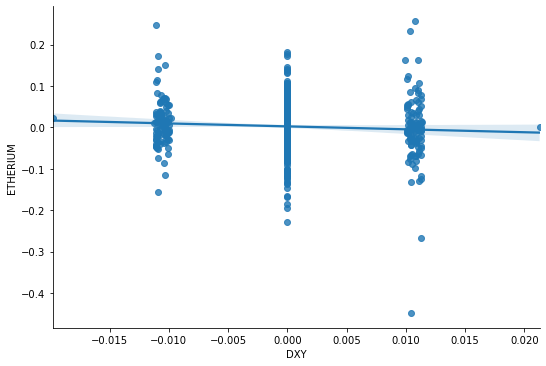

In [542]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
B3 = sns.lmplot(x='DXY', y='ETHERIUM', data=df_daily, aspect=1.5, fit_reg=True)

## TETHER VS DXY

In [553]:
# Calculate covariance of a single portfolio
TD_covariance = df_daily['TETHER'].cov(df_daily['DXY'])
TD_covariance

nan

In [554]:
# Calculate variance of DXY
TD_variance = df_daily['TETHER'].var()
TD_variance

nan

In [555]:
# Computing beta
Tether_beta = TD_covariance / TD_variance
Tether_beta

nan

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of TETHER Returns vs. DXY Returns'}, xlabel='Date'>

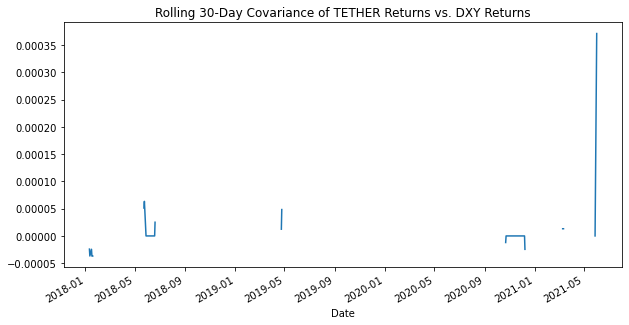

In [556]:
# Calculate 30-day rolling covariance of GOLD vs. DXY and plot the data
TD_rolling_covariance = df_daily['TETHER'].rolling(window=30).cov(df_daily['DXY'])
TD_rolling_covariance.plot(figsize=(10, 5), title='Rolling 30-Day Covariance of TETHER Returns vs. DXY Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of DXY Returns'}, xlabel='Date'>

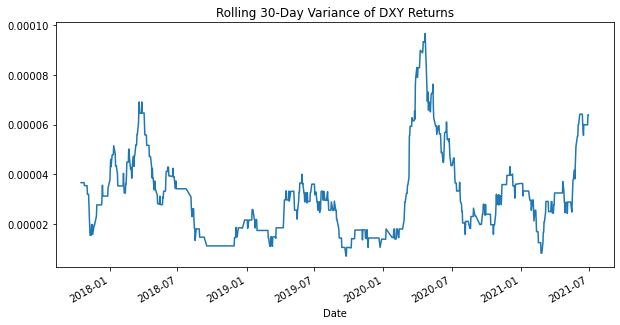

In [557]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_variance = df_daily['DXY'].rolling(window=30).var()
rolling_variance.plot(figsize=(10, 5), title='Rolling 30-Day Variance of DXY Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of ETHERIUM'}, xlabel='Date'>

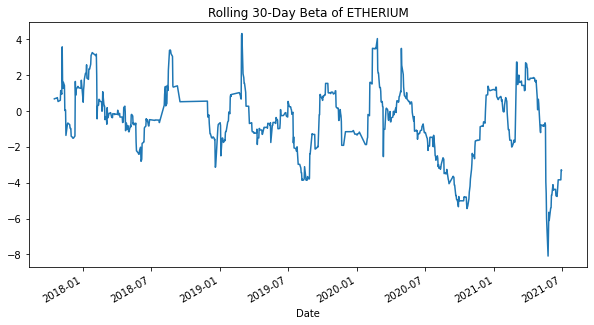

In [558]:
# Calculate 30-day rolling beta of MSFT and plot the data
ED_rolling_beta = ED_rolling_covariance / rolling_variance
ED_rolling_beta.plot(figsize=(10, 5), title='Rolling 30-Day Beta of ETHERIUM')

/Users/audreygutierrez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning:

All-NaN slice encountered



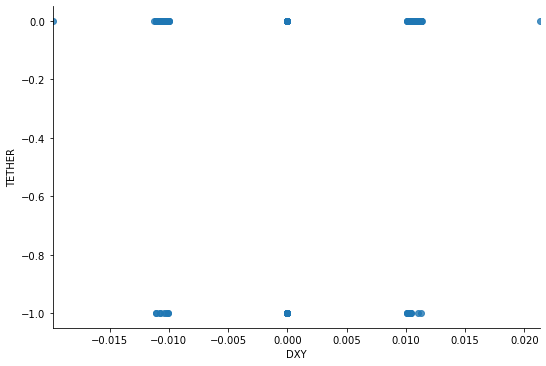

In [559]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
B4 = sns.lmplot(x='DXY', y='TETHER', data=df_daily, aspect=1.5, fit_reg=True)

In [560]:
print(Gold_beta,Bitcoin_beta,Etherium_beta,Etherium_beta)
#Etherium has the lowest Beta

-0.1448051315012391 -0.010354295765602949 -0.006900644819356844 -0.006900644819356844


# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [475]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

GOLD        0.605365
BITCOIN     1.088895
ETHERIUM    0.695578
DXY        -0.135860
TETHER           NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

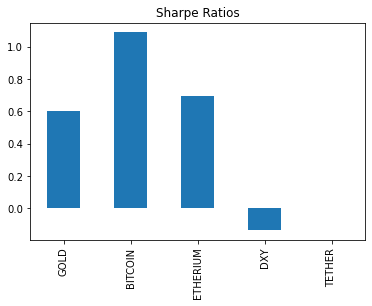

In [476]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the CRYPTO outperform both Gold and the DXY portfolios.

Write your answer here!

---